In [1]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set(style="white")

#sklearn
from sklearn import metrics
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X = mnist["data"]
y = mnist["target"].ravel()
y = y.astype(np.uint8)

In [4]:
# one hot encoding: 1 na indeksu koji predstavlja pojedini simbol, svi ostali elementi vektora su 0.
# npr: broj 3 je [0,0,0,1,0,...,0]
y_vectors = np.zeros((len(y),14)) # 4 operacije + 10 znamenaka = 14 znakova
for i,val in enumerate(y):
    y_vectors[i][val] = 1
y_vectors = y_vectors.astype(np.uint8)

In [5]:
import joblib
operation_symbols = joblib.load("operation_symbols.pkl")
X = np.append(X, operation_symbols["data"], axis=0)
y_vectors = np.append(y_vectors, operation_symbols["target"], axis=0)
X.shape, y_vectors.shape

((74464, 784), (74464, 14))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y_vectors, test_size=0.15, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((63294, 784), (11170, 784), (63294, 14), (11170, 14))

In [7]:
%%time
forest = RandomForestClassifier(max_depth=16, n_jobs=-1)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

Wall time: 48.2 s


<AxesSubplot:>

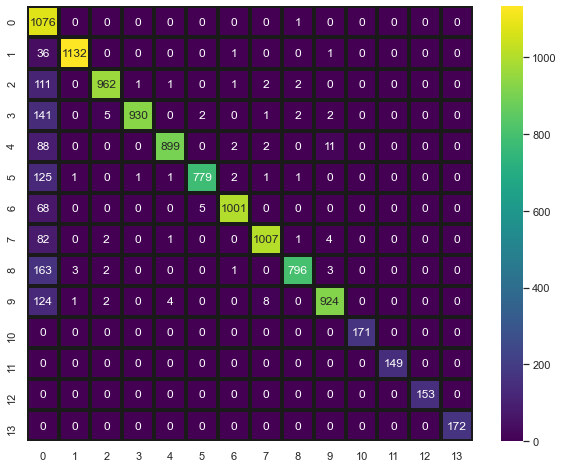

In [8]:
plt.figure(figsize=(10,8))
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
sns.heatmap(cm, annot=True, cmap="viridis", fmt="d", linecolor="k", linewidths=3)

In [11]:
def draw_symbols(symbols):
    n = len(symbols)
    fig, ax = plt.subplots(nrows=1, ncols=n, figsize=(n,1), sharex="all", sharey="all")
    
    for i,s in enumerate(symbols):
        ax[i].imshow(s.reshape(28,28), cmap = matplotlib.cm.binary, interpolation="nearest")
    
    for a in ax:
        a.axis("off")

In [12]:
numbers = X_test[y_test.argmax(axis=1)<=9]
pluses = X_test[y_test.argmax(axis=1)==10]
minuses = X_test[y_test.argmax(axis=1)==11]
times = X_test[y_test.argmax(axis=1)==12]
divisions = X_test[y_test.argmax(axis=1)==13]
symbols = X_test[y_test.argmax(axis=1)>=10]

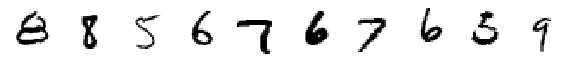

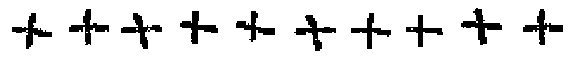

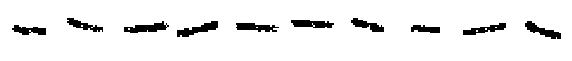

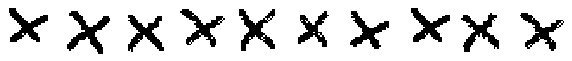

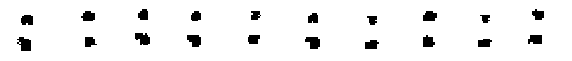

In [13]:
draw_symbols(numbers[:10])
draw_symbols(pluses[:10])
draw_symbols(minuses[:10])
draw_symbols(times[:10])
draw_symbols(divisions[:10])

In [14]:
class Calculator:
    myestimator = None
    mysymbols = None
    
    def __init__(self, estimator, symbols):
        self.myestimator = estimator
        self.mysymbols = symbols
        
    def draw_symbols(self):
        n = len(self.mysymbols)
        fig, ax = plt.subplots(nrows=1, ncols=n, figsize=(n,1), sharex="all", sharey="all")

        for i,s in enumerate(self.mysymbols):
            ax[i].imshow(s.reshape(28,28), cmap = matplotlib.cm.binary, interpolation="nearest")

        for a in ax:
            a.axis("off")
            
    def read_symbols(self):
        n = len(self.mysymbols)
        y_pred = self.myestimator.predict(self.mysymbols).argmax(axis=1)
        y_pred = y_pred.astype("str")
        y_pred = np.char.replace(y_pred, "10", "+")
        y_pred = np.char.replace(y_pred, "11", "-")
        y_pred = np.char.replace(y_pred, "12", "*")
        y_pred = np.char.replace(y_pred, "13", "/")
        y_pred = "".join(y_pred)
        return y_pred
    
    def calculate(self):
        return eval(self.read_symbols())
    
    def change_estimator(self, estimator):
        self.myestimator = estimator
    
    def change_symbols(self, symbols):
        self.mysymbols = symbols

In [17]:
c = Calculator(forest,np.vstack((numbers[9:12], pluses[20], numbers[25], times[100], numbers[400], divisions[42], numbers[451])))

946+4*6/2 = 958.0


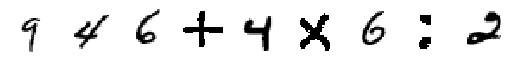

In [18]:
c.draw_symbols()
equation = c.read_symbols()
solution = c.calculate()
print(f"{equation} = {solution}")

In [19]:
import random
random.seed(4)

m = len(symbols)

def rand(n):
    return random.randint(0,n)

def rand_eq():
    return np.vstack((numbers[rand(m)], symbols[rand(m)], numbers[rand(m)], symbols[rand(m)], numbers[rand(m)], symbols[rand(m)], numbers[rand(m)]))

7-2/2*2 = 5.0


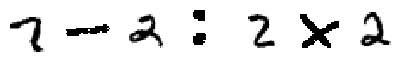

In [20]:
eq = rand_eq()
c.change_symbols(eq)
c.draw_symbols()
equation = c.read_symbols()
solution = c.calculate()
print(f"{equation} = {solution}")

1-6-7-3 = -15


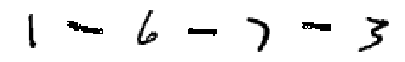

In [22]:
eq = rand_eq()
c.change_symbols(eq)
c.draw_symbols()
equation = c.read_symbols()
solution = c.calculate()
print(f"{equation} = {solution}")

0-2-6+0 = -8


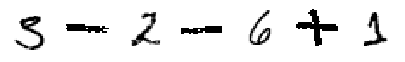

In [23]:
eq = rand_eq()
c.change_symbols(eq)
c.draw_symbols()
equation = c.read_symbols()
solution = c.calculate()
print(f"{equation} = {solution}")

3*5-1-0 = 14


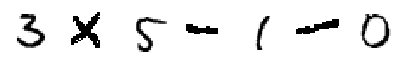

In [24]:
eq = rand_eq()
c.change_symbols(eq)
c.draw_symbols()
equation = c.read_symbols()
solution = c.calculate()
print(f"{equation} = {solution}")